# Syn data performance
> coPTR vs aPTR on synthetic dataset

In [1]:
import sys
sys.path.append('/home/phil/aptr')
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# First things first
Are there even any overlaps?

## Loading and preprocessing data

In [4]:
coptr_ptrs = pd.read_csv(
    '../../experiments/synthetic/coptr_out/coptr_log2_ptrs.csv', 
    dtype={0: str}
)
coptr_ptrs = coptr_ptrs.set_index('log2(PTR):genome_id/sample_id')
coptr_ptrs = 2**coptr_ptrs

In [5]:
coptr_ptrs

,SRR2081071,SRR2081072,SRR2081073,SRR2081074,SRR2081075,SRR2081082,SRR2081092,SRR2082404,SRR2082405,SRR2082406,...,SRR2082422,SRR2082423,SRR2082425,SRR2082426,SRR2082429,SRR2082443,SRR2082445,SRR2082446,SRR2082447,SRR2082449
log2(PTR):genome_id/sample_id,,,,,,,,,,,,,,,,,,,,,
1384484.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.114320,NaN
209261.6,1.152145,1.089253,1.162372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.026363,1.000007,1.000001,NaN,NaN,NaN,NaN,NaN,NaN,NaN
264199.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
267747.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.087795,NaN,NaN,1.028200,NaN,NaN,NaN,NaN,NaN,NaN
28116.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.250035,1.269629,1.245936,1.266868,1.358720,NaN
295319.15,1.000007,1.015478,1.000004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.046612,1.106495,1.231776,NaN,NaN,NaN,NaN,NaN,NaN,NaN
326425.4,1.945028,1.988953,1.964543,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.856641,NaN,NaN,NaN,NaN,NaN,NaN
367928.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.982724,2.109885,NaN
390333.7,1.499257,1.507926,1.473531,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
aptr_path = '../../experiments/synthetic/aptr_out_100_nofilter/inferred_ptrs.tsv'
# aptr_path = '../../experiments/synthetic/aptr_out_99_nofilter/inferred_ptrs.tsv'
aptr_ptrs = pd.read_csv(aptr_path, sep='\t', dtype={0: str})
aptr_ptrs = aptr_ptrs.set_index('Unnamed: 0')
aptr_ptrs

,SRR2079821,SRR2080619,SRR2080621,SRR2080623,SRR2080624,SRR2080625,SRR2080626,SRR2080627,SRR2080628,SRR2080629,...,SRR2081059,SRR2081060,SRR2081061,SRR2081062,SRR2081064,SRR2081065,SRR2081066,SRR2081067,SRR2081068,SRR2081069
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
479436.6,12.571669,11.448911,11.524969,12.502012,8.287810e-02,2.066598e-13,3.290889e-07,8.613780e-13,1.396995e+00,1.865073e+01,...,10.530795,10.886967,11.577447,5.976382,2.435058e-04,1.232194e-02,2.610917e-01,9.731766e+00,4.356806e+00,9.713507e+00
435590.9,0.975817,0.888863,0.940781,0.231959,1.308606e+10,6.667668e+00,3.773610e-01,1.687321e-01,6.493533e-01,8.202154e+01,...,1.480685,1.172305,1.985356,1.260318,7.326853e+14,5.775096e+14,7.994227e+14,4.323534e+15,4.326636e+15,2.314362e+15
701521.8,10.026966,9.524906,9.574546,9.922831,1.064555e+01,3.022376e+00,9.217650e+00,2.230318e+00,4.978258e+00,1.500196e+01,...,8.649529,9.124948,9.369557,5.389252,7.582364e+00,7.523253e+00,7.408845e+00,8.947343e+00,8.649778e+00,8.563323e+00
637910.3,18.509924,17.158195,17.272758,18.474165,1.764779e+01,5.141986e+00,4.961646e+03,5.428219e+00,4.267023e+02,3.629338e+01,...,1.832016,1.828532,1.596780,1.674877,1.423639e+01,1.407177e+01,1.388256e+01,1.768617e+01,1.696097e+01,1.674760e+01
557436.4,59.213670,53.224220,53.704760,57.315174,1.078703e-09,2.333595e+01,3.860024e-08,9.067295e+04,5.526200e-09,2.021754e-09,...,36.277050,37.048943,39.049830,21.195726,4.887883e+01,4.800781e+01,4.717557e+01,6.337789e+01,5.984713e+01,5.887719e+01
632245.3,1.161131,1.146166,1.149824,1.160467,4.963009e-16,1.100000e-44,8.303305e+04,1.640000e-43,3.072738e-01,1.227231e+00,...,1.162484,1.163257,1.166754,1.085053,1.132441e+00,1.131607e+00,1.129943e+00,1.161028e+00,1.156736e+00,1.155204e+00
469607.3,13.003549,12.002905,12.095842,12.864787,1.339148e+01,3.008214e+00,1.034987e+01,2.356879e+00,4.930905e+00,2.632369e+01,...,11.163738,11.325748,11.817364,5.628301,9.684345e+00,9.568640e+00,9.410038e+00,1.237872e+01,1.182930e+01,1.166927e+01
28116.7,13.808739,12.803824,12.958641,14.545947,1.431418e+15,3.503610e+00,9.304647e+14,inf,5.621390e+00,inf,...,15.833250,12.640712,12.192420,6.369628,4.226116e-01,7.232045e-01,6.146810e-01,7.692114e-02,7.568427e-02,6.324082e-02
568703.9,38.119343,34.118120,34.462790,37.841120,3.312425e+01,4.928743e+00,2.275061e+01,4.425865e+00,7.676633e+00,9.996024e+01,...,21.515415,25.571213,27.287655,12.895646,2.865060e+01,2.780445e+01,2.752410e+01,3.881594e+01,3.559271e+01,3.583042e+01


In [9]:
# OK, so we need to figure out how to map the sample IDs together.

sample_ids = pd.read_csv("../../experiments/synthetic/synthetic_ids.txt")
sample_dict = {}

for i, row in sample_ids.iterrows():
    acc = row['Run']
    sample_id = row['Label'].split(".")[0]
    sample_dict[acc] = sample_id

shared_cols = list(set([sample_dict[x] for x in coptr_ptrs.columns]) & set([sample_dict[x] for x in aptr_ptrs.columns]))
print(shared_cols)

['MIX9A', 'CD4TisA', 'DON3B', 'DON2B', 'MIX3', 'MIX7B', 'DON3C', 'CD11Bx', 'MIX2', 'MIX1', 'IL10-LF', 'CDIFFA', 'CD4Bx', 'DON2C', 'IL10-C', 'CD11TisA', 'DON1B', 'CD11TisB', 'IL10-HF', 'IBDA', 'DON2A', 'DON1A', 'MIX7A', 'CD4TisB', 'CDIFFB', 'MIX8B', 'MIX8A', 'IBDB', 'DON3A']


In [10]:
shared_genomes = list(set(coptr_ptrs.index) & set(aptr_ptrs.index))
print(shared_genomes)

['557436.4', '435590.9', '28116.7']


In [11]:
# So we need to rename the columns in both DFs to get agreement

aptr_ptrs.columns = [sample_dict[x] for x in aptr_ptrs.columns]
aptr_ptrs = aptr_ptrs[shared_cols]
aptr_ptrs = aptr_ptrs.reindex(shared_genomes)

coptr_ptrs.columns = [sample_dict[x] for x in coptr_ptrs.columns]
coptr_ptrs = coptr_ptrs[shared_cols]
coptr_ptrs = coptr_ptrs.reindex(shared_genomes)


## Checking agreement

In [12]:
good_aptr = ~np.isnan(aptr_ptrs)
good_coptr = ~np.isnan(coptr_ptrs)
good_both = good_aptr & good_coptr

# How many genomes have both good PTRs?
good_both.sum().sum()

20

In [13]:
coptr_ptrs.reindex(aptr_ptrs.index)[good_both]\
    .dropna(how='all', axis=0).dropna(how='all', axis=1)

,MIX9A,DON3B,DON2B,MIX3,MIX2,MIX1,DON2C,IL10-C,DON1B,IL10-HF,DON2A,DON1A,DON3A
Unnamed: 0,,,,,,,,,,,,,
557436.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.174187,NaN,NaN,NaN,NaN,NaN
435590.9,1.330158,1.409011,1.348897,1.720332,1.721191,1.706967,1.379462,NaN,1.256932,1.860647,1.324256,1.211923,1.350090
28116.7,NaN,1.358720,1.269629,NaN,NaN,NaN,1.245936,NaN,1.414126,NaN,1.250035,1.565895,1.266868


In [14]:
aptr_ptrs[good_both].dropna(how='all', axis=0).dropna(how='all', axis=1)

,MIX9A,DON3B,DON2B,MIX3,MIX2,MIX1,DON2C,IL10-C,DON1B,IL10-HF,DON2A,DON1A,DON3A
Unnamed: 0,,,,,,,,,,,,,
557436.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.021754e-09,NaN,NaN,NaN,NaN,NaN
435590.9,1.260318,4.326636e+15,5.775096e+14,0.940781,0.888863,0.975817,7.994227e+14,NaN,1.122852e+16,2.536039e+16,7.326853e+14,3.908805e+15,4.323534e+15
28116.7,NaN,7.568427e-02,7.232045e-01,NaN,NaN,NaN,6.146810e-01,NaN,1.556438e+07,NaN,4.226116e-01,1.378427e+10,7.692114e-02


In [15]:
aptr_ptrs[(aptr_ptrs < 3) & (aptr_ptrs >= 1) & good_both]

,MIX9A,CD4TisA,DON3B,DON2B,MIX3,MIX7B,DON3C,CD11Bx,MIX2,MIX1,...,IBDA,DON2A,DON1A,MIX7A,CD4TisB,CDIFFB,MIX8B,MIX8A,IBDB,DON3A
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
557436.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435590.9,1.260318,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28116.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
n_reads = pd.read_csv("../../experiments/synthetic/aptr_out_99_nofilter/n_reads_used.tsv", sep='\t', dtype={0: str})
n_reads = n_reads.set_index('Unnamed: 0')
n_reads.columns = [sample_dict[x] for x in n_reads.columns]
n_reads[good_both].dropna(how='all', axis=0).dropna(how='all', axis=1)

,MIX1,MIX2,MIX3,IL10-C,IL10-HF,DON1A,DON1B,MIX9A,DON2A,DON2B,DON2C,DON3A,DON3B
Unnamed: 0,,,,,,,,,,,,,
435590.9,564.899272,621.934347,297.873517,NaN,17.63945,8.023749,6.278242,423.089833,11.523102,6.174554,23.013836,7.428055,8.461485
557436.4,NaN,NaN,NaN,17.471119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28116.7,NaN,NaN,NaN,NaN,NaN,161.678694,240.038212,NaN,1535.502698,809.380611,3034.549741,1110.170312,1300.507036


Text(0.5, 1.0, 'Error in PTR vs. number of reads used')

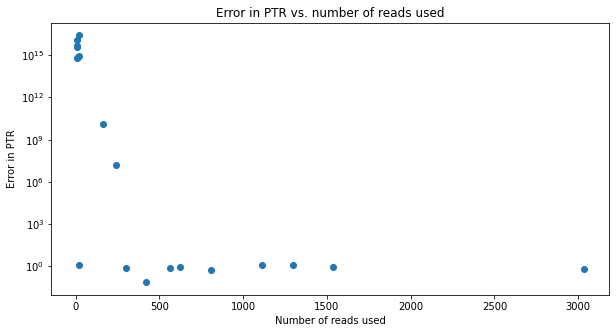

In [19]:
errs = aptr_ptrs[good_both] - coptr_ptrs[good_both]
cols = set(coptr_ptrs.columns) & set(aptr_ptrs.columns)
errs = errs[cols]

fig = plt.figure(figsize=(10, 5))
plt.scatter(
    n_reads[good_both].reindex(errs.index)[cols].values.flatten(),
    np.abs(errs).values.flatten()
)
plt.yscale("log")
# plt.ylim(np.abs(errs).values.min(), 1e17)
plt.xlabel("Number of reads used")
plt.ylabel("Error in PTR")
plt.title("Error in PTR vs. number of reads used")

# Manual exploration

Computing PTRs by hand for specific promising clades. Here we notice that the
genome `435590.9` (Bacteroides vulgatus) has promising amounts of coverage:

In [20]:
# Load intermediate database to ensure MD5s match OTU table

import pickle

db = pickle.load(open("../../experiments/synthetic/aptr_out_100/db.pkl", "rb"))
db.db

,genome,n_contigs,contig,feature,16s_position,oor_position,size,16s_sequence,md5
60,575540.3,2,NC_014962,fig|575540.3.rna.55,5377423,202,5529304,tgccagcagccgcggtaagacgaaccgtgcaaacgttattcggaat...,d56813f94d066da79326147843d54c1f
61,575540.3,2,NC_014962,fig|575540.3.rna.46,4713338,202,5529304,tgccagcagccgcggtaagacgaaccgtgcaaacgttattcggaat...,d56813f94d066da79326147843d54c1f
62,575540.3,2,NC_014962,fig|575540.3.rna.38,4041636,202,5529304,tgccagcagccgcggtaagacgaaccgtgcaaacgttattcggaat...,e997d7a3c0c347d96d50214d6ed2f787
95,546269.5,1,CP002390,fig|546269.5.rna.10,719673,88,1931012,tgccagcagccgcggtaatacgtagggggcaagcgttatccggaat...,4ebce09c21f3d04f64f0e5eb1b8a4847
96,546269.5,1,CP002390,fig|546269.5.rna.33,764888,88,1931012,tgccagcagccgcggtaatacgtagggggcaagcgttatccggaat...,4ebce09c21f3d04f64f0e5eb1b8a4847
...,...,...,...,...,...,...,...,...,...
7926,471881.3,11,NZ_GG661996,fig|471881.3.rna.29,198505,124357,3749229,tgccagcagccgcggtaatacggagggtgcaagcgttaatcggaat...,cb3a2710c3e4da0ab88cde482a04435a
7957,644284.3,1,NC_014218,fig|644284.3.rna.48,1610087,77,1986154,tgccagcagccgcggtaatacgtagggcgcgagcgttgtccggaat...,1ad5fe0a24204313cd97864252f30d90
7958,644284.3,1,NC_014218,fig|644284.3.rna.11,493763,77,1986154,tgccagcagccgcggtaatacgtagggcgcgagcgttgtccggaat...,908d6a7f038e6fdffa6b3845547f0c5a
7959,644284.3,1,NC_014218,fig|644284.3.rna.35,1073265,77,1986154,tgccagcagccgcggtaatacgtagggcgcgagcgttgtccggaat...,908d6a7f038e6fdffa6b3845547f0c5a


In [21]:
# Add genome IDs to OTU table

otu_table = pd.read_csv("../../experiments/synthetic/aptr_out_100/otu_table.tsv", sep='\t', dtype={0: str})
otu_table = otu_table.set_index('#OTU ID')
otu_table.columns = [sample_dict[x] for x in otu_table.columns]
otu_table["genomes"] = [db.find_genomes_by_md5([x]) for x in otu_table.index]
otu_table = otu_table[["genomes", *otu_table.columns[:-1]]]
otu_table = otu_table.sort_values(by="genomes", ascending=False)
otu_table

,genomes,MIX1,MIX2,MIX3,CD4Bx,CD4TisA,CD11Bx,CD11TisA,CD4TisB,CD11TisB,...,MIX7B,MIX8A,MIX8B,MIX9A,DON2A,DON2B,DON2C,DON3A,DON3B,DON3C
#OTU ID,,,,,,,,,,,,,,,,,,,,,
9dd1c3b75daf034bc431cb886600a4f6,[762550.4],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4cc7fa868f6553cd7b0ff99a67f87641,[714313.3],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3cd7622d7072c198b7d19c6996254301,[701521.8],0,0,0,0,0,0,0,0,0,...,5,0,3,2,0,0,0,0,0,0
1b58e2aa85779bd1db01cd0fed155601,[701521.8],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
80f8b4dba9e498d49c3254cd20ebe0f0,[66692.6],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4d891631a5931de4c4de1ac7fa0cfdf0,[640131.3],0,0,0,0,0,0,0,0,0,...,13,14,19,10,0,0,0,0,0,0
fefd61bb00126e4bf352ad4b319a3902,[637910.3],0,0,0,0,0,0,0,0,0,...,1188,3089,2222,2045,0,0,0,0,0,0
27b337b1f5c98c155a3a62984aca8a3f,[637910.3],0,0,0,0,0,0,15,0,39,...,8837,22952,15702,14429,0,0,0,0,0,0
8c3a8045575161030c76b6c5e8b1e5a3,"[592022.4, 1348623.7, 545693.3]",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
db["435590.9"].sort_values(by="16s_position")

,genome,n_contigs,contig,feature,16s_position,oor_position,size,16s_sequence,md5
1527,435590.9,1,NC_009614,fig|435590.9.rna.8,346728,244,5163189,tgccagcagccgcggtaatacggaggatccgagcgttatccggatt...,94f128434aaffec0dc3a129f2afad905
1529,435590.9,1,NC_009614,fig|435590.9.rna.18,647827,244,5163189,tgccagcagccgcggtaatacggaggatccgagcgttatccggatt...,94f128434aaffec0dc3a129f2afad905
1530,435590.9,1,NC_009614,fig|435590.9.rna.37,2095440,244,5163189,tgccagcagccgcggtaatacggaggatccgagcgttatccggatt...,94f128434aaffec0dc3a129f2afad905
1528,435590.9,1,NC_009614,fig|435590.9.rna.42,2183532,244,5163189,tgccagcagccgcggtaatacggaggatccgagcgttatccggatt...,94f128434aaffec0dc3a129f2afad905
1526,435590.9,1,NC_009614,fig|435590.9.rna.51,2587719,244,5163189,tgccagcagccgcggtaatacggaggatccgagcgttatccggatt...,c89d1de8519a383c4ded7c4c4d749b5a
1532,435590.9,1,NC_009614,fig|435590.9.rna.96,4430462,244,5163189,tgccagcagccgcggtaatacggaggatccgagcgttatccggatt...,8417c6a78dc4334150c2f4df256820ee
1531,435590.9,1,NC_009614,fig|435590.9.rna.101,4743125,244,5163189,tgccagcagccgcggtaatacggaggatccgagcgttatccggatt...,94f128434aaffec0dc3a129f2afad905


(0.9, 1.5)

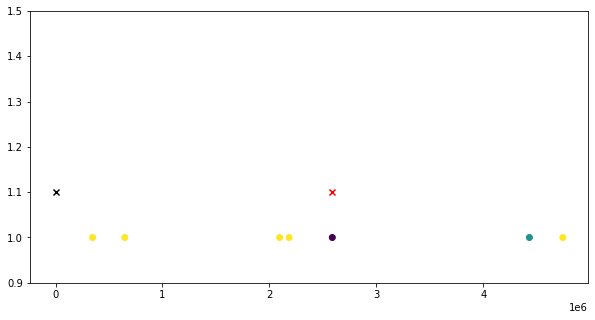

In [23]:
seqs = list(db["435590.9"]["md5"])
seqs_uniq = list(set(seqs))
seqs_num = [int(seqs_uniq.index(x)) for x in seqs]

fig = plt.figure(figsize=(10, 5))
plt.scatter(
    x=db["435590.9"]["16s_position"],
    y=np.ones(len(db["435590.9"])),
    c=seqs_num
)
plt.scatter(
    x=244, y=1.1, c="black", marker="x"
)
plt.scatter(
    x=int(5163189/2 + 244) , y=1.1, c="red", marker="x"
)
plt.ylim(0.9, 1.5)

In [24]:
seqs_num

[0, 2, 2, 2, 2, 2, 1]

In [25]:
obj, md5s, gen2seq = db.generate_genome_objects("435590.9")

In [26]:
db.generate_genome_objects("435590.9")[1]

['c89d1de8519a383c4ded7c4c4d749b5a',
 '94f128434aaffec0dc3a129f2afad905',
 '8417c6a78dc4334150c2f4df256820ee']

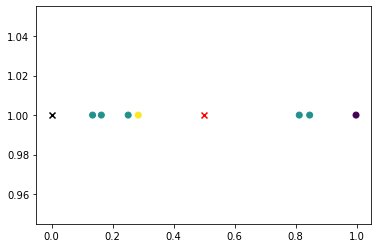

In [27]:
# Plot the sequences and locations for genome 435590.9:

obj, md5s, gen2seq = db.generate_genome_objects("435590.9")

# 16S positions marked with a dot, colored by MD5
plt.scatter(
    x=obj[0]['pos'].flatten(), 
    y=np.ones(len(obj[0]['pos'])),
    c=obj[0]['seqs']
)

# OOR marked with an X
plt.scatter(
    x=db["435590.9"]['oor_position'].iloc[0] / db["435590.9"]['size'].iloc[0],
    y=1,
    marker='x',
    c='black'
)

# Trough marked with an X
plt.scatter(
    x=(db["435590.9"]['oor_position'].iloc[0] + 
    (db["435590.9"]['size'].iloc[0] / 2)) / db["435590.9"]['size'].iloc[0],
    y=1,
    marker='x',
    c='red'
)

# 8417c6a78dc4334150c2f4df256820ee (yellow) is near OOR
# c89d1de8519a383c4ded7c4c4d749b5a (purple) is near trough

In [32]:
# Since the yellow sequence (8417...) 

otus_reduced = otu_table.loc[md5s]
otus_reduced = otus_reduced.drop(columns=["genomes"])
otus_reduced / otus_reduced.loc["c89d1de8519a383c4ded7c4c4d749b5a"] 
# This is a problem... we should not see 8417... lower than 1

,MIX1,MIX2,MIX3,CD4Bx,CD4TisA,CD11Bx,CD11TisA,CD4TisB,CD11TisB,IL10-C,...,MIX7B,MIX8A,MIX8B,MIX9A,DON2A,DON2B,DON2C,DON3A,DON3B,DON3C
#OTU ID,,,,,,,,,,,,,,,,,,,,,
c89d1de8519a383c4ded7c4c4d749b5a,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.0,1.0,1.0,1.000000,...,1.000000,1.00000,1.000,1.000000,NaN,NaN,1.0,NaN,NaN,NaN
94f128434aaffec0dc3a129f2afad905,5.026430,4.775734,4.919089,2.709587,15.333333,inf,3.5,2.0,4.0,3.363636,...,6.529412,5.27907,7.650,5.809696,inf,inf,7168.0,inf,inf,inf
8417c6a78dc4334150c2f4df256820ee,0.763131,0.770626,0.805970,0.001265,0.000000,NaN,0.0,0.5,0.0,0.363636,...,1.000000,1.05814,1.175,1.089221,inf,inf,2.0,inf,NaN,inf


In [39]:
# By manual inspection we found some samples that have reasonably high read
# counts for this genome. Here we try to force the torch solver to solve it:

from src.torch_solver import TorchSolver

good_md5s = [
    "c89d1de8519a383c4ded7c4c4d749b5a",
    "8417c6a78dc4334150c2f4df256820ee",
    "94f128434aaffec0dc3a129f2afad905",
]
good_samples = [
    "MIX1",
    "MIX2",
    "MIX3",
    "CD4Bx",
    "MIX7A",
    "MIX7B",
    "MIX8A",
    "MIX8B",
    "MIX9A",
]


otus_reduced = otu_table.loc[good_md5s, good_samples]

solver = TorchSolver(db=db, otus=otus_reduced)


Using OTU index for md5s


In [41]:
solver.train(clip=True, verbose=False)
solver.B_hat.exp2().detach().numpy()

array([[1.       , 1.       , 1.       , 1.       , 1.       , 1.3018996,
        1.0922718, 1.6854321, 1.       ]], dtype=float32)

In [43]:
coptr_ptrs.loc["435590.9", good_samples].values

array([1.70696697, 1.72119144, 1.72033188,        nan,        nan,
              nan,        nan,        nan, 1.33015825])

# Try poisson

In [45]:
import torch

solver_poisson = TorchSolver(db=db, otus=otus_reduced, normalize=False)
_ = solver_poisson.train(
    loss_fn=torch.nn.PoissonNLLLoss(log_input=False),
    # clip=True,
    # normalize=False,
    lr=1e-4,
    epochs=10,
)


Using OTU index for md5s
Initial:	 -5507.00244140625
Epoch 0:	 -5964.19775390625
Epoch 1:	 -6385.93017578125
Epoch 2:	 -6782.154296875
Epoch 3:	 -7159.14306640625
Epoch 4:	 -7520.79150390625
Epoch 5:	 -7869.6474609375
Epoch 6:	 -8207.4970703125
Epoch 7:	 -8535.7265625
Epoch 8:	 -8855.3916015625
Epoch 9:	 -9167.451171875


In [47]:
# coPTR "ground truth" shows PTRs around 1.7 for the first 3 samples, 1.3 for 
# the last one

coptr_ptrs.loc["435590.9", good_samples].values

array([1.70696697, 1.72119144, 1.72033188,        nan,        nan,
              nan,        nan,        nan, 1.33015825])

In [48]:
# However, the torch solver seems to find the PTR to be <1.0 everywhere...

solver_poisson.B_hat.exp().detach().numpy()

array([[0.9915835 , 0.99171424, 0.99176705, 0.992949  , 1.0019883 ,
        1.0023167 , 0.99389505, 0.9944573 , 0.991377  ]], dtype=float32)

In [49]:
solver_poisson.A_hat.exp().detach().numpy()

array([[6.9835258, 6.9836206, 6.982915 , 6.9836316, 6.917131 , 6.9083333,
        6.9680533, 6.958136 , 6.9833794]], dtype=float32)

In [50]:
coptr_ptrs_nonnan = coptr_ptrs.loc["435590.9", good_samples].values[
    ~np.isnan(coptr_ptrs.loc["435590.9", good_samples].values)
]
aptr_ptrs_nonnan = solver_poisson.A_hat.exp().detach().numpy()[
    (~np.isnan(coptr_ptrs.loc["435590.9", good_samples].values)).reshape(1,9)
]

# Find pearson R between coPTR and torch solver
from scipy.stats import pearsonr

rval, pval = pearsonr(coptr_ptrs_nonnan, aptr_ptrs_nonnan) 
print(f"Pearson R: {rval:.3f}, p-value: {pval:.3f}") # Wow, this is really bad

Pearson R: -0.052, p-value: 0.948


In [51]:
otus_reduced

,MIX1,MIX2,MIX3,CD4Bx,MIX7A,MIX7B,MIX8A,MIX8B,MIX9A
#OTU ID,,,,,,,,,
c89d1de8519a383c4ded7c4c4d749b5a,2989,3915,1273,7114,31,17,86,40,1939
8417c6a78dc4334150c2f4df256820ee,2281,3017,1026,9,22,17,91,47,2112
94f128434aaffec0dc3a129f2afad905,15024,18697,6262,19276,109,111,454,306,11265


In [68]:
solver_poisson2 = TorchSolver(
    db=db, otus=otu_table.iloc[:, 1:], normalize=False
)
solver_poisson2.train(
    loss_fn=torch.nn.PoissonNLLLoss(log_input=False),
    clip=True,
    # normalize=False,
    lr=1e-1,
    epochs=50,
)


Using OTU index for md5s
Initial:	 -1357.624755859375
Epoch 0:	 -4542.8515625
Epoch 1:	 -4994.453125
Epoch 2:	 -5285.166015625
Epoch 3:	 -5510.6474609375
Epoch 4:	 -5699.58447265625
Epoch 5:	 -5863.23828125
Epoch 6:	 -6006.51318359375
Epoch 7:	 -6131.8017578125
Epoch 8:	 -6241.46826171875
Epoch 9:	 -6337.26611328125
Epoch 10:	 -6420.37060546875
Epoch 11:	 -6492.1708984375
Epoch 12:	 -6554.44091796875
Epoch 13:	 -6609.06689453125
Epoch 14:	 -6657.46826171875
Epoch 15:	 -6697.8603515625
Epoch 16:	 -6732.88916015625
Epoch 17:	 -6763.39111328125
Epoch 18:	 -6790.01025390625
Epoch 19:	 -6813.3876953125
Epoch 20:	 -6834.083984375
Epoch 21:	 -6852.62890625
Epoch 22:	 -6864.01611328125
Epoch 23:	 -6879.17236328125
Epoch 24:	 -6892.857421875
Epoch 25:	 -6905.11865234375
Epoch 26:	 -6916.1611328125
Epoch 27:	 -6926.158203125
Epoch 28:	 -6935.18212890625
Epoch 29:	 -6943.375
Epoch 30:	 -6950.88330078125
Epoch 31:	 -6957.81689453125
Epoch 32:	 -6964.25
Epoch 33:	 -6970.25390625
Epoch 34:	 -6975.87

(array([[1.3885075e+00, 5.5613484e+00, 1.8521587e+00, 2.2964907e-01,
         2.2964907e-01, 3.4523545e+03, 9.2486840e-01, 1.6203327e+00,
         2.2964907e-01, 3.7067740e+00, 3.2431202e+00, 1.1566850e+00,
         1.9010633e+01, 2.8209143e+02, 2.3850405e+01, 5.1527439e+01,
         2.0393229e+01, 2.7308672e+01, 0.0000000e+00, 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
         0.0000000e+00, 1.1061780e+01, 3.4549675e+00, 2.0047560e+01,
         1.0346290e+00, 2.4176793e+00, 6.8888736e-01],
        [2.0148448e+03, 2.4832036e+03, 8.5018658e+02, 2.1336335e+03,
         5.5406313e+00, 4.5566288e-01, 7.3131591e-01, 5.6961298e-01,
         4.0711221e-01, 4.2063346e+00, 1.8625154e+03, 1.6202689e+00,
         4.0829658e+03, 4.1051411e+03, 6.8179083e-01, 2.7157509e+00,
         1.7959620e+03, 2.1944949e+03, 1.1793078e-01, 1.1335820e+00,
         1.3104667e+01, 1.6392897e+01, 6.8597527e+01, 4.4415787e+01,
         1.7306515e+03, 4.0965268e+02, 2.2215532

In [69]:
ptr_est = solver_poisson2.B_hat.exp2().detach().numpy()
ptr_est * ((ptr_est > 1) & (ptr_est < 2))

array([[0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       ],
       [1.5042027, 1.429445 , 1.5050136, 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 1.0041103, 0.       , 1.8292918, 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       

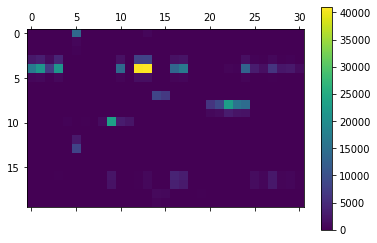

In [70]:
plt.matshow(solver_poisson2(solver_poisson2.A_hat, solver_poisson2.B_hat).detach().numpy().astype(int))
plt.colorbar()

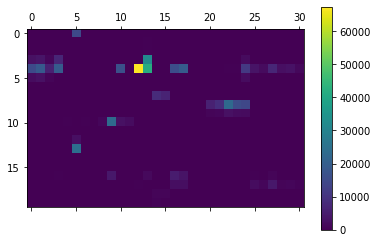

In [71]:
plt.matshow(solver_poisson2.coverages.numpy().astype(int))
plt.colorbar()

In [73]:
solver_poisson2_ptrs = pd.DataFrame(
    solver_poisson2.B_hat.exp2().detach().numpy(),
    index=solver_poisson2.genome_ids,
    columns=solver_poisson2.sample_ids
)

# Try to learn amplicon bias term instead

In [120]:
# Keep samples for which coPTR has a PTR estimate
columns_to_keep = coptr_ptrs.columns[~np.isnan(coptr_ptrs.loc["435590.9"])]
bias_otus = otu_table.loc[md5s][columns_to_keep]
bias_ptrs = coptr_ptrs.loc["435590.9"][columns_to_keep]

bias_solver = TorchSolver(db=db, otus=bias_otus, normalize=False)

Using OTU index for md5s


In [130]:
def train_solver(solver, otus, ptrs):
    # Initialize a_hat and b_hat
    solver.A_hat = torch.Tensor(otus.sum(axis=0).values.reshape(1, -1))
    solver.A_hat.requires_grad = True
    solver.B_hat = torch.Tensor(np.log2(ptrs).values.reshape(1, -1))
    solver.B_hat.requires_grad = True
    solver.bias = torch.ones(solver.k, requires_grad=True)

    # Initialize optimizer and counters
    optimizer = torch.optim.Adam([solver.A_hat, solver.bias], lr=.1)

    # Add as attributes
    solver.optimizer = optimizer
    loss_fn = torch.nn.PoissonNLLLoss(log_input=False)
    solver.loss_fn = loss_fn

    print(
        "Initial:\t",
        loss_fn(
            solver(solver.A_hat, solver.B_hat, solver.bias), solver.coverages
        ).item()
    )

    for epoch in range(100):
        for _ in range(1000):
            optimizer.zero_grad()

            # Forward pass
            F_hat = solver(solver.A_hat, solver.B_hat, solver.bias)
            loss = loss_fn(F_hat, solver.coverages)

            loss.backward()
            optimizer.step()

            solver.A_hat.data = solver.A_hat.clamp(0, None)  # Nonneg.
            solver.bias.data = solver.bias.clamp(0, 1)  # Nonneg.

        print(f"Epoch {epoch}:\t {loss}")

train_solver(bias_solver, bias_otus, bias_ptrs)

Initial:	 266.1768798828125
Epoch 0:	 -31676.521484375
Epoch 1:	 -31676.857421875
Epoch 2:	 -31676.951171875
Epoch 3:	 -31677.2578125
Epoch 4:	 -31677.861328125
Epoch 5:	 -31678.982421875
Epoch 6:	 -31674.142578125
Epoch 7:	 -31669.78515625
Epoch 8:	 -31680.40625
Epoch 9:	 -31681.634765625
Epoch 10:	 -31675.99609375
Epoch 11:	 -31682.388671875
Epoch 12:	 -31681.9140625
Epoch 13:	 -31683.8203125
Epoch 14:	 -31681.615234375
Epoch 15:	 -31681.15625
Epoch 16:	 -31683.955078125
Epoch 17:	 -31682.875
Epoch 18:	 -31682.947265625
Epoch 19:	 -31684.705078125
Epoch 20:	 -31684.763671875
Epoch 21:	 -31683.455078125
Epoch 22:	 -31683.7734375
Epoch 23:	 -31679.21875
Epoch 24:	 -31684.763671875
Epoch 25:	 -31684.6015625
Epoch 26:	 -31681.048828125
Epoch 27:	 -31684.91015625
Epoch 28:	 -31684.228515625
Epoch 29:	 -31684.28515625
Epoch 30:	 -31684.6328125
Epoch 31:	 -31676.197265625
Epoch 32:	 -31680.6875
Epoch 33:	 -31677.12109375
Epoch 34:	 -31682.708984375
Epoch 35:	 -31684.8046875
Epoch 36:	 -3168

In [131]:
bias_solver.bias

tensor([0.0584, 0.1009, 0.0377], requires_grad=True)

In [132]:
bias_solver.A_hat

tensor([[14088.4229,  3076.6360,  1818.4054,  8806.7568, 26399.7871, 20823.7227,
          6701.5850, 17415.3770, 17531.1523,  3325.5183, 14013.3623,  2620.5740]],
       requires_grad=True)

In [175]:
# Check for agreement under jackknifing

bias_estimates = {}
bias_estimates2 = {}
clip = True
# for i in range(0, len(bias_otus.columns), 5):
for col in bias_otus.columns:
    new_cols = bias_otus.columns.drop(col)
    # new_cols = bias_otus[:i].columns.append(bias_otus[i+5:].columns)
    heldout_solver = TorchSolver(
        db=db, otus=bias_otus[new_cols], normalize=False
    )
    other_solver = TorchSolver(
        db=db, otus=bias_otus[col], normalize=False
    )
    train_solver(heldout_solver, bias_otus[new_cols], bias_ptrs[new_cols])
    train_solver(other_solver, bias_otus[[col]], bias_ptrs[[col]])
    bias_estimates[col] = heldout_solver.bias.detach().numpy()
    bias_estimates2[col] = other_solver.bias.detach().numpy()
    # bias_estimates[i] = heldout_solver.bias.detach().numpy()

TypeError: set_vals() got an unexpected keyword argument 'clip'

In [174]:
for key in bias_estimates:
    print(
        key,
        " ".join([f"{x:.3f}" for x in (bias_estimates[key] / bias_estimates[key].max())]),
        " ".join([f"{x:.3f}" for x in (bias_estimates2[key] / bias_estimates2[key].max())]),
        sep="\t"
    )

MIX9A	0.447 1.000 0.248	0.998 1.000 0.925
DON3B	0.540 1.000 0.312	0.000 1.000 0.000
DON2B	0.552 1.000 0.311	0.000 1.000 0.005
MIX3	0.490 1.000 0.281	1.000 0.717 0.547
MIX2	0.384 1.000 0.228	1.000 0.696 0.523
MIX1	0.386 1.000 0.296	1.000 0.736 0.521
DON2C	0.521 1.000 0.334	1.000 1.000 0.002
DON1B	0.609 1.000 0.395	0.000 0.212 1.000
IL10-HF	0.576 1.000 0.426	0.002 0.432 1.000
DON2A	0.528 1.000 0.367	0.000 1.000 0.003
DON1A	0.560 1.000 0.373	0.996 0.290 1.000
DON3A	0.545 1.000 0.375	0.000 1.000 0.002


In [176]:
# So that was inconclusive. Can we at least get a good pearson R with the learned biases?

solver_with_biases = TorchSolver(
    db=db, otus=otu_table.iloc[:, 1:], normalize=False
)
solver.bias = bias_solver.bias
solver_with_biases.train(
    loss_fn=torch.nn.PoissonNLLLoss(log_input=False),
    clip=True,
    model_bias=False # Use learned bias instead
)
solver.B_hat.exp2()

Using OTU index for md5s
Initial:	 -1357.624755859375
Epoch 0:	 -2111.055908203125
Epoch 1:	 -2392.858642578125
Epoch 2:	 -2598.122802734375
Epoch 3:	 -2764.622314453125
Epoch 4:	 -2906.859619140625
Epoch 5:	 -3031.751708984375
Epoch 6:	 -3143.157958984375
Epoch 7:	 -3243.55712890625
Epoch 8:	 -3334.728271484375
Epoch 9:	 -3418.0458984375
Epoch 10:	 -3494.6162109375
Epoch 11:	 -3565.3427734375
Epoch 12:	 -3630.975830078125
Epoch 13:	 -3692.14111328125
Epoch 14:	 -3749.36279296875
Epoch 15:	 -3803.08544921875
Epoch 16:	 -3853.6845703125
Epoch 17:	 -3901.48388671875
Epoch 18:	 -3946.758056640625
Epoch 19:	 -3989.744384765625
Epoch 20:	 -4030.654052734375
Epoch 21:	 -4069.665771484375
Epoch 22:	 -4106.94287109375
Epoch 23:	 -4142.62158203125
Epoch 24:	 -4176.82568359375
Epoch 25:	 -4209.66845703125
Epoch 26:	 -4241.248046875
Epoch 27:	 -4271.65380859375
Epoch 28:	 -4300.96875
Epoch 29:	 -4329.26513671875
Epoch 30:	 -4356.6015625
Epoch 31:	 -4383.04443359375
Epoch 32:	 -4408.6484375
Epoch 

tensor([[1.3302, 1.4090, 1.3489, 1.7203, 1.7212, 1.7070, 1.3795, 1.2569, 1.8606,
         1.3243, 1.2119, 1.3501]], grad_fn=<Exp2Backward0>)

In [184]:
# Perhaps unsurprisingly, adding in learned biases forces the PTR estimates to be almost exactly the
# same as the coPTR estimates --- and in fact the Pearson R is 1.0

pearsonr(solver.B_hat.exp2().detach().numpy().flatten(), coptr_ptrs.loc["435590.9", columns_to_keep].values)

(0.999999999999987, 2.912265867747076e-69)

In [192]:
solver_colearning = TorchSolver(
    db=db, otus=bias_otus, normalize=False
)
solver_colearning.train(
    loss_fn=torch.nn.PoissonNLLLoss(log_input=False),
    clip=True,
    model_bias=True # Learn bias
)

pearsonr(solver_colearning.B_hat.exp2().detach().numpy().flatten(), coptr_ptrs.loc["435590.9", columns_to_keep].values)

# So this doesn't work either. 

Using OTU index for md5s
Initial:	 -6953.0810546875
Epoch 0:	 -12992.0654296875
Epoch 1:	 -15626.888671875
Epoch 2:	 -17537.263671875
Epoch 3:	 -19077.28515625
Epoch 4:	 -20382.7109375
Epoch 5:	 -21518.099609375
Epoch 6:	 -22519.443359375
Epoch 7:	 -23409.86328125
Epoch 8:	 -24205.978515625
Epoch 9:	 -24920.65625
Epoch 10:	 -25564.248046875
Epoch 11:	 -26145.302734375
Epoch 12:	 -26670.9453125
Epoch 13:	 -27147.42578125
Epoch 14:	 -27580.6015625
Epoch 15:	 -27974.73828125
Epoch 16:	 -28333.744140625
Epoch 17:	 -28661.55859375
Epoch 18:	 -28962.564453125
Epoch 19:	 -29238.5703125
Epoch 20:	 -29490.513671875
Epoch 21:	 -29719.90234375
Epoch 22:	 -29928.6640625
Epoch 23:	 -30118.9921875
Epoch 24:	 -30292.642578125
Epoch 25:	 -30451.759765625
Epoch 26:	 -30597.49609375
Epoch 27:	 -30730.6015625
Epoch 28:	 -30851.853515625
Epoch 29:	 -30962.2265625
Epoch 30:	 -31062.16015625
Epoch 31:	 -31152.458984375
Epoch 32:	 -31233.798828125
Epoch 33:	 -31306.78125
Epoch 34:	 -31371.8203125
Epoch 35:	 

(-0.5100468943458436, 0.09023970613113849)